In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from xgboost import XGBRegressor

#Load data

Dataset can be found at Kaggle: [Vehicle dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

In [29]:
car_data = pd.read_csv("/content/car data.csv")
print('Shape:', car_data.shape)
car_data.head()

Shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#Data pre-processing

In [30]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [31]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


##Missing values

In [33]:
#we don't have missing values in this dataset, so skip this step

##Encoding the categorical data

In [34]:
print('----- Fuel_Type -----')
print(car_data.Fuel_Type.value_counts())

print('\n----- Seller_Type -----')
print(car_data.Seller_Type.value_counts())

print('\n----- Transmission -----')
print(car_data.Transmission.value_counts())

----- Fuel_Type -----
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

----- Seller_Type -----
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

----- Transmission -----
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encode Fuel_Type

In [35]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(car_data[['Fuel_Type']], columns=['Fuel_Type'], prefix=['Fuel'] )

# merge with main df bridge_df on key values
car_data = car_data.join(dum_df)

Encode Seller_Type

In [36]:
dum_df = pd.get_dummies(car_data[['Seller_Type']], columns=['Seller_Type'], prefix=['Seller'] )

car_data = car_data.join(dum_df)

Encode Transmission

In [37]:
dum_df = pd.get_dummies(car_data[['Transmission']], columns=['Transmission'], prefix=['Transmission'] )

car_data = car_data.join(dum_df)

##Drop redundent columns

In [38]:
car_data.drop(['Car_Name','Fuel_Type', 'Transmission', 'Seller_Type'], axis=1, inplace=True)

In [39]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Seller_Dealer,Seller_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


##Split data into X and Y

In [40]:
Y = car_data[['Selling_Price']]
print('Y shape:', Y.shape)
Y.head()

Y shape: (301, 1)


,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [41]:
X = car_data.drop('Selling_Price', axis=1)
print('X shape:', X.shape)
X.head()

X shape: (301, 11)


,Year,Present_Price,Kms_Driven,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Seller_Dealer,Seller_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,1,0,1,0,0,1


In [42]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print('X shape:', X.shape)
X.head()

X shape: (301, 11)


,Year,Present_Price,Kms_Driven,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Seller_Dealer,Seller_Individual,Transmission_Automatic,Transmission_Manual
0,0.128897,-0.236215,-0.256224,-0.174501,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
1,-0.217514,0.221505,0.155911,-0.174501,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
2,1.168129,0.257427,-0.773969,-0.174501,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
3,-0.910335,-0.403079,-0.817758,-0.174501,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
4,0.128897,-0.087890,0.141743,-0.174501,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148


#Model Training

Split data into train and test sets

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Fit models

In [44]:
#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

#Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

#XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

[13:51:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#Model Evaluation

Predict

In [45]:
lin_train_pred = lin_model.predict(X_train)
lin_test_pred = lin_model.predict(X_test)

lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

R squared error

In [46]:
#Linear Regression
train_error_score = metrics.r2_score(Y_train, lin_train_pred)
test_error_score = metrics.r2_score(Y_test, lin_test_pred)

print('Linear Regression')
print("R^2 Error on Train data: ", train_error_score)
print("R^2 Error on Test  data: ", test_error_score)

#Lasso Regression
train_error_score = metrics.r2_score(Y_train, lasso_train_pred)
test_error_score = metrics.r2_score(Y_test, lasso_test_pred)

print('\nLasso Regression')
print("R^2 Error on Train data: ", train_error_score)
print("R^2 Error on Test  data: ", test_error_score)

#XGB Regressor
train_error_score = metrics.r2_score(Y_train, xgb_train_pred)
test_error_score = metrics.r2_score(Y_test, xgb_test_pred)

print('\nXGB Regressor')
print("R^2 Error on Train data: ", train_error_score)
print("R^2 Error on Test  data: ", test_error_score)

Linear Regression
R^2 Error on Train data:  0.8826805250490879
R^2 Error on Test  data:  0.8693753727249836

Lasso Regression
R^2 Error on Train data:  0.7847221803537492
R^2 Error on Test  data:  0.8057184578918476

XGB Regressor
R^2 Error on Train data:  0.993757340118743
R^2 Error on Test  data:  0.9725998844098888


#Visualize the actual prices and Predicted prices

1. Linear Regression

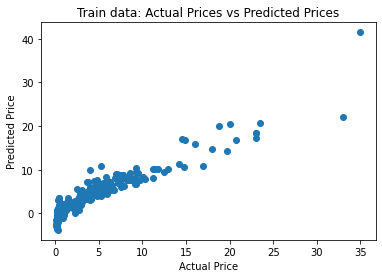

In [47]:
plt.scatter(Y_train, lin_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train data: Actual Prices vs Predicted Prices")
plt.show()

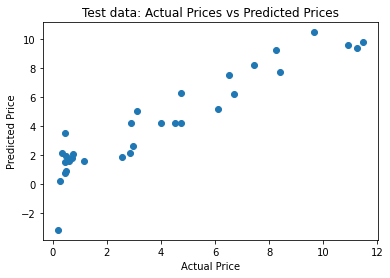

In [48]:
plt.scatter(Y_test, lin_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test data: Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

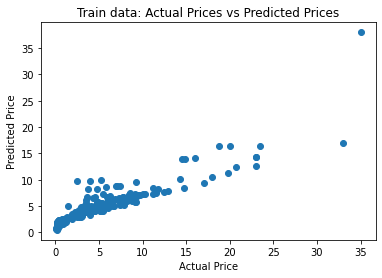

In [49]:
plt.scatter(Y_train, lasso_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train data: Actual Prices vs Predicted Prices")
plt.show()

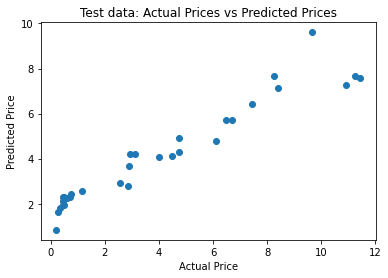

In [50]:
plt.scatter(Y_test, lasso_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test data: Actual Prices vs Predicted Prices")
plt.show()

3. XGB Regressor

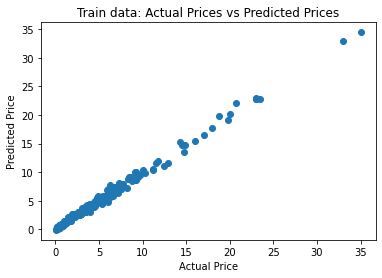

In [51]:
plt.scatter(Y_train, xgb_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train data: Actual Prices vs Predicted Prices")
plt.show()

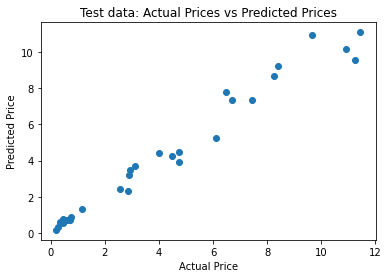

In [52]:
plt.scatter(Y_test, xgb_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test data: Actual Prices vs Predicted Prices")
plt.show()